<img src="img/header.png" />

<img src="img/title.png" />


<h1 style="color:#003152">Project: Investigate No-show Dataset - 2016</h1>

<h2 style="color:#02B3E4">Table of Contents</h2>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
<h2 style="color:#02B3E4">Introduction</h2>

In this section of the report,  a brief introduction to the dataset is provided, as well as the describtion of the analysis questions to be explored over the course of the report. 


><ul>
    <li><b>No-Show Appointments Dataset Describtion:</b><br>
        <p>This dataset collects information from more than 100k medical appointments in Brazil in 2016,
            and is focused on the question of whether patients have shown up for their appointment or not.The below table               contains a brief description about the dataset as the following: 
            </p><br>
        <table style="width:fit-content">
        <tr>
            <th style="text-align: left">Field</th>
            <th style="text-align: left">Describtion</th>
        </tr>
        <tr>
            <td style="text-align: left">PatientId</td>	
            <td style="text-align: left">The identifier of the patient</td>
        </tr>
        <tr>
            <td style="text-align: left">AppointmentID</td>	
            <td style="text-align: left">The identifier of the appointment</td>
        </tr>
        <tr>
            <td style="text-align: left">Gender</td>	
            <td style="text-align: left">Indicates patient's gender</td>
        </tr>
        <tr>
            <td style="text-align: left">ScheduledDay</td>	
            <td style="text-align: left">Reflects when appointment was shceduled</td>
        </tr>
                <tr>
            <td style="text-align: left">AppointmentDay</td>	
            <td style="text-align: left">Reflects when the real appointment happened, where patients have seen the 
                doctor or not</td>
        </tr>
        <tr>
            <td style="text-align: left">Age</td>	
            <td style="text-align: left">Indicates patient's age</td>
        </tr>
        <tr>
            <td style="text-align: left">Neighbourhood</td>	
            <td style="text-align: left">Indicates hospital location where appoinments were occuring</td>
        </tr>
        <tr>
            <td style="text-align: left">Scholarship</td>	
            <td style="text-align: left">Indicates whether patient is currently enrolled in a scholarship or not</td>
        </tr>
        <tr>
            <td style="text-align: left">Hipertension</td>	
            <td style="text-align: left">Indecates whether patient has a hipertension (high blood pressure) or not</td>
        </tr>
        <tr>
            <td style="text-align: left">Diabetes</td>	
            <td style="text-align: left">Indecates whether patient has a diabetes or not</td>
        </tr>
         <tr>
            <td style="text-align: left">Alcoholism</td>	
            <td style="text-align: left">Indicates whether patient is an alcoholic or not</td>
        </tr>
        <tr>
            <td style="text-align: left">Handcap</td>	
            <td style="text-align: left">Indecates whether patient is handicaped or not</td>
        </tr>
         <tr>
            <td style="text-align: left">SMS_received</td>	
            <td style="text-align: left">Indicates whether patient recived an SMS or not</td>
        </tr>
        <tr>
            <td style="text-align: left">No-show</td>	
            <td style="text-align: left">Indecates whether patient has seen the doctor or not</td>
        </tr>
        </table>
   </li> 
   <br>
   <li><b>Analysis Questions:</b><br>
       <ol>
           <li>When was the highest number of appointments?</li>
           <li>What is the total number of show/no-show appointments?</li>
           <li>What is the total number of show/no-show appointments per month? When was the highest no-show rate?</li>
           <li>What is the total number of show/no-show appointments per gender? Who has the highest no-show rate?</li>
           <li>What is the total number of show/no-show appointments per age group? Which group has 
               the highest no-show rate?</li>
           <li>What is the total number of show/no-show appointments for those who have a chornic diseases?</li>
           <li>Where was the highest number of appointments?</li>
           <li>Were patients who have scolarship commited to their appointments more?</li>
           <li>Does Alcoholism affects patients commitment to their appointments?</li>
           <li>Does receiving an SMS as a reminder improves patients commitment to their appointments?</li>
       </ol>
   </li>
   <br>
    <li><b>Dependent and Independent Variables to be Explored:</b><br>
         <ol>
           <li>Dependent Variable: Total Number of No-Shows</li>
           <li>Independent Variables: Date (Month), Patient Characteristics (Gender-Age), Patient Medical History (Chronic                        Diseases-Alcoholisim-Disabilities), and Scolarship</li>
       </ol>
    </li>
</ul>

In [1]:
# packages importing statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib import cm
import seaborn as sns
from scipy.stats import norm
import squarify    # pip install squarify (algorithm for treemap)
%matplotlib inline

<a id='wrangling'></a>
<h2 style="color:#02B3E4">Data Wrangling</h2>

> In this section of the report, the data will be checked for cleanliness, and then trimmed and cleaned for analysis.


### Loading Data and Assessing Quality

In [2]:
# Loading dataframe
df = pd.read_csv('noshowappointments-may-2016.csv')

In [3]:
#Check dataset dimentions 
df.shape

(110527, 14)

In [4]:
#return dataset fields
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#check null values & datatypes
df.info()  
#we don't have null values, but we have to modify datatypes to be appropriately aligned with the analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning 

In [6]:
#update datatypes

df['PatientId'] = df['PatientId'].astype('int64')
df['Gender'] = df['Gender'].astype('object')
df['Scholarship'] = df['Scholarship'].astype('object')
df['Hipertension'] = df['Hipertension'].astype('object')
df['Diabetes'] = df['Diabetes'].astype('object')
df['Alcoholism'] = df['Alcoholism'].astype('object')
df['Handcap'] = df['Handcap'].astype('object')
df['SMS_received'] = df['SMS_received'].astype('object')
df['No-show'] = df['No-show'].astype('object')

In [7]:
#update datatypes for dates

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [8]:
#Check dataset after updates
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  object        
 8   Hipertension    110527 non-null  object        
 9   Diabetes        110527 non-null  object        
 10  Alcoholism      110527 non-null  object        
 11  Handcap         110527 non-null  object        
 12  SMS_received    110527 non-null  object        
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(3), obje

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#Check if we have duplicated rows or not
df.duplicated().sum()

0

In [10]:
#Check unique values in each field
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay         111
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [11]:
#replace data values to be more readable

df["Gender"].replace({"F": "Female", "M": "Male"}, inplace=True)
df["Scholarship"].replace({0: "No Scholarship", 1: "Has Scholarship"}, inplace=True)
df["Diabetes"].replace({0: "No Diabetes", 1: "Has Diabetes"}, inplace=True)
df["Hipertension"].replace({0: "No Hipertension", 1: "Has Hipertension"}, inplace=True)
df["No-show"].replace({"Yes": "No show", "No": "Show"}, inplace=True)
df["Alcoholism"].replace({0: "Not Alcoholic", 1: "Alcoholic"}, inplace=True)
df["Handcap"].replace({0: "Not Handicaped", 1: "Handicaped"}, inplace=True)
df["SMS_received"].replace({0: "Not Received", 1: "Received"}, inplace=True)

In [12]:
#check dataset after updates
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No Scholarship,Has Hipertension,No Diabetes,Not Alcoholic,Not Handicaped,Not Received,Show
1,558997776694438,5642503,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No Scholarship,No Hipertension,No Diabetes,Not Alcoholic,Not Handicaped,Not Received,Show
2,4262962299951,5642549,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,No Scholarship,No Hipertension,No Diabetes,Not Alcoholic,Not Handicaped,Not Received,Show
3,867951213174,5642828,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No Scholarship,No Hipertension,No Diabetes,Not Alcoholic,Not Handicaped,Not Received,Show
4,8841186448183,5642494,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No Scholarship,Has Hipertension,Has Diabetes,Not Alcoholic,Not Handicaped,Not Received,Show


In [13]:
# rename No-show column, following naming convention rules in relational databases
df.rename(columns={'No-show':'No_show'}, inplace=True)

In [14]:
# since we only have 3 numerical values(PatientId, AppointmentID, and Age) I want to focus only on Age 
# to find the range of patients' ages (youngest to oldest)
df['Age'].describe() 
#I noticed that we have -1 as youngest age which doesn't make sense so it might be entered by mistake, so I'll drop that row

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [15]:
# getting the index of that row where age = -1 using:
df.index[df['Age'] == -1 ].tolist()

[99832]

In [16]:
#drop the row with -1 age 
df.drop(index=[99832], inplace=True) 

In [17]:
#to make sure it was dropped
df['Age'].describe() 

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [18]:
#check the dataframe after dropping that row
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110526 non-null  int64         
 1   AppointmentID   110526 non-null  int64         
 2   Gender          110526 non-null  object        
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   Age             110526 non-null  int64         
 6   Neighbourhood   110526 non-null  object        
 7   Scholarship     110526 non-null  object        
 8   Hipertension    110526 non-null  object        
 9   Diabetes        110526 non-null  object        
 10  Alcoholism      110526 non-null  object        
 11  Handcap         110526 non-null  object        
 12  SMS_received    110526 non-null  object        
 13  No_show         110526 non-null  object        
dtypes: datetime64[ns](2), int64(3), obje

In [19]:
# Age range is from 0 to 115 years old
# creating a new column for age_group to classify patients according to thier ages like the following:

# create a list of age conditions
ages = [
    (df['Age'] <= 14),
    (df['Age'] > 14) & (df['Age'] <= 24),
    (df['Age'] > 24) & (df['Age'] <= 59),
    (df['Age'] >= 60)
    ]

# create a list of the values to be assigned for each condition
values = ['Children', 'Youth', 'Adults', 'Seniors']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Age_group'] = np.select(ages, values)

# display updated DataFrame
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age_group
0,29872499824296,5642903,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No Scholarship,Has Hipertension,No Diabetes,Not Alcoholic,Not Handicaped,Not Received,Show,Seniors
1,558997776694438,5642503,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No Scholarship,No Hipertension,No Diabetes,Not Alcoholic,Not Handicaped,Not Received,Show,Adults
2,4262962299951,5642549,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,No Scholarship,No Hipertension,No Diabetes,Not Alcoholic,Not Handicaped,Not Received,Show,Seniors
3,867951213174,5642828,Female,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No Scholarship,No Hipertension,No Diabetes,Not Alcoholic,Not Handicaped,Not Received,Show,Children
4,8841186448183,5642494,Female,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No Scholarship,Has Hipertension,Has Diabetes,Not Alcoholic,Not Handicaped,Not Received,Show,Adults


In [20]:
#check appointment dates values & range
df['AppointmentDay'].value_counts()

#the data was collected from april to june 2016

2016-06-06    4691
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64

In [21]:
#create new column for month of the Appointment date
df['Appointment_month'] = df['AppointmentDay'].dt.month_name()
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age_group,Appointment_month
0,29872499824296,5642903,Female,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No Scholarship,Has Hipertension,No Diabetes,Not Alcoholic,Not Handicaped,Not Received,Show,Seniors,April
1,558997776694438,5642503,Male,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No Scholarship,No Hipertension,No Diabetes,Not Alcoholic,Not Handicaped,Not Received,Show,Adults,April
2,4262962299951,5642549,Female,2016-04-29,2016-04-29,62,MATA DA PRAIA,No Scholarship,No Hipertension,No Diabetes,Not Alcoholic,Not Handicaped,Not Received,Show,Seniors,April


<a id='eda'></a>
<h2 style="color:#02B3E4">Exploratory Data Analysis</h2>

> Now the data is trimmed, cleaned and ready to be explored. 

### Research Question 1: When was the highest number of appointments?

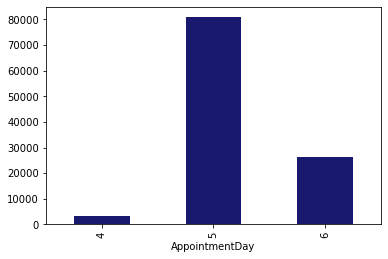

In [22]:
#Q1: when was the highest no. of appointments? 

group1 = df['AppointmentID'].groupby(df['AppointmentDay'].dt.month).count().plot(kind='bar', color = 'midnightblue')

In [23]:
#graph validation:
df['AppointmentID'].groupby(df['AppointmentDay'].dt.month).count()

AppointmentDay
4     3235
5    80841
6    26450
Name: AppointmentID, dtype: int64

> **Observations:** The above barchart shows that the highest number of appointments was in May, 2016

### Research Question 2: What is the total number of show/no-show appointments?

Text(0.5, 1.0, 'Total appointments by no-show status')

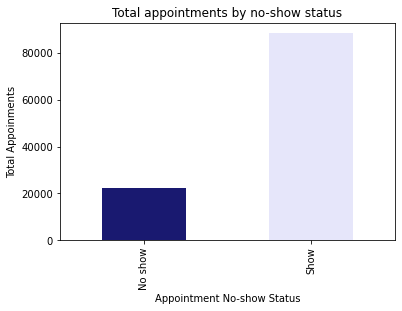

In [24]:
#Q2: total shows/no-shows?

group2 = df['AppointmentID'].groupby(df['No_show']).count().plot(kind='bar', color = ['midnightblue', 'lavender'])
plt.xlabel("Appointment No-show Status")
plt.ylabel("Total Appoinments")
plt.title("Total appointments by no-show status")

In [25]:
#graph validation
df['No_show'].value_counts()

Show       88207
No show    22319
Name: No_show, dtype: int64

> **Observations:** The above barchart shows that no-show appointments represents a small amount of the total appointments, 
comparing it to the show amount

In [56]:
#creating a user-defined function to plot stacked barcharts
def stacked_bar(values_list, show_values, noshow_values, x, y, title):
    plt.bar(values_list, show_values, color='lavender')
    plt.bar(values_list, noshow_values, color='midnightblue' )
    plt.legend(["Show", "No show"])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.show()

### Research Question 3: What is the total number of show/no-show appointments per month? When was the highest no-show rate?

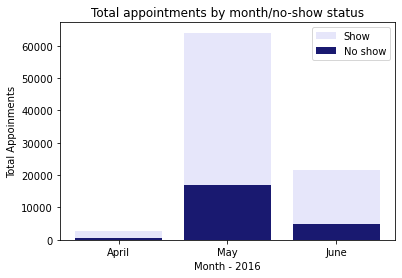

In [57]:
#Q3: how many shows/no-shows per month? when was the highest no-show rate?

#to find the counts of show/no-show in each month as array:
apr = df[df['Appointment_month']=="April"]
m1 = apr['No_show'].value_counts().array

may = df[df['Appointment_month']=="May"]
m2 = may['No_show'].value_counts().array

jun = df[df['Appointment_month']=="June"]
m3 = jun['No_show'].value_counts().array

#getting values
show = [m1[0], m2[0], m3[0]]
noshow = [m1[1], m2[1], m3[1]]

# to get the months list (april, may, june)
months_list = pd.unique(df['Appointment_month'])

#plotting No. of show/no-show by month 
stacked_bar(months_list, show, noshow, "Month - 2016","Total Appoinments", "Total appointments by month/no-show status")


In [27]:
#graph validation 
print('Show values= ')
print(show)
print('No show values= ')
print(noshow)

Show values= 
[2602, 64037, 21568]
No show values= 
[633, 16804, 4882]


> **Observation:** The above stacked barchart shows that the highest rate of no-show was in may 2016

### Research Question 4: What is the total number of show/no-show appointments per gender? Who has the highest no-show rate?

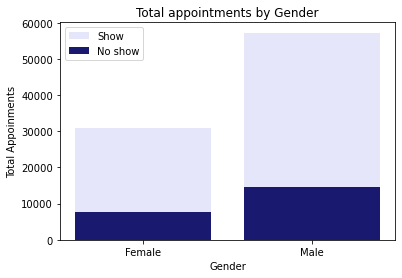

In [58]:
#Q4: how many shows/no-shows per gender?

#to find the counts of show/no-show per gender as array:
gender_m = df[df['Gender']=="Male"]
male = gender_m['No_show'].value_counts().array

gender_f = df[df['Gender']=="Female"]
female = gender_f['No_show'].value_counts().array

# getting values
show = [male[0], female[0]]
noshow = [male[1], female[1]]

# to get list of gender (male, female):
gender_list = pd.unique(df['Gender'])

#plotting No. of show/no-show by gender
stacked_bar(gender_list, show, noshow, "Gender","Total Appoinments", "Total appointments by Gender")


In [29]:
#graph validation:
print('Show values= ')
print(show)
print('No show values= ')
print(noshow)

Show values= 
[30962, 57245]
No show values= 
[7725, 14594]


> **Observation:** The above stacked barchart shows that males have higher number of appointments, as well as higher number of no-shows comparing to females

### Research Question 5: What is the total number of show/no-show appointments per age group? Which group has the highest no-show rate?

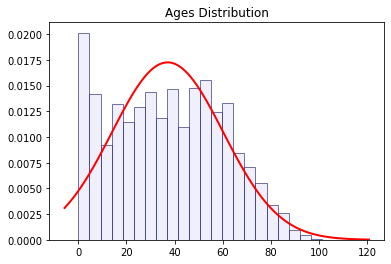

In [30]:
# finding the distrubution of ages
 
# Plotting the histogram
m, std = norm.fit(df['Age'])
plt.hist(df['Age'], bins=25, density=True, alpha=0.6, color='lavender', edgecolor='midnightblue')

# Plotting the distrbution line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, m, std)
  
plt.plot(x, p, 'r', linewidth=2)

plt.title('Ages Distribution') 

plt.show()

> **Observation:** The above hsitogram shows the distribution of patients' ages. The histogram is skewed right. Few patients whose ages are older than 80 were having appointments, while most of the patients were between 10 and 60 years old. Moreover, the number of newborns was the highest comparing to the other ages.

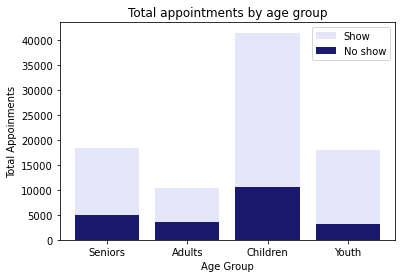

In [60]:
#Q5: how many shows/no-shows per age group?

#'Youth', 'Adults', 'Seniors'

#to find the counts of show/no-show per age group as an array:
age1 = df[df['Age_group']=="Children"]
children = age1['No_show'].value_counts().array

age2 = df[df['Age_group']=="Youth"]
youth = age2['No_show'].value_counts().array

age3 = df[df['Age_group']=="Adults"]
adults = age3['No_show'].value_counts().array

age4 = df[df['Age_group']=="Seniors"]
seniors = age4['No_show'].value_counts().array

#getting values
show = [children[0], youth[0], adults[0], seniors[0]]
noshow = [children[1], youth[1], adults[1], seniors[1]]

# to get list of ages:
age_list = pd.unique(df['Age_group'])

#plotting No. of show/no-show by age group
stacked_bar(age_list, show, noshow, "Age Group","Total Appoinments", "Total appointments by age group")

In [32]:
#graph validation:
print('Show values= ')
print(show)
print('No show values= ')
print(noshow)

Show values= 
[18331, 10470, 41475, 17931]
No show values= 
[4926, 3540, 10611, 3242]


> **Observation:** The above stacked barchart shows that that childern have that highest number of appointments, as well as no-show rate. The total appointments of seniors and youth is close, but no-show rate is higher for patients who were seniors. In the other hand, the rates of no-show for youth and adults are almost similar.

### Research Question 6: What is the total number of show/no-show appointments for those who have a chornic diseases? 

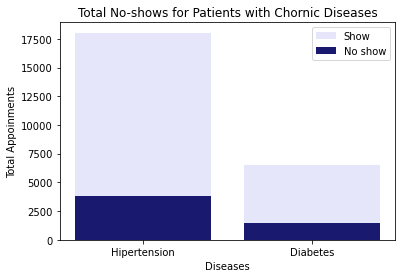

In [61]:
#Q6: how many shows/no-shows for those who have a chornic diseases?

#to find the counts of show/no-show per disease as an array:   Hipertension	Diabetes
diseases1 = df[df['Hipertension']=="Has Hipertension"]
hipe = diseases1['No_show'].value_counts().array

diseases2 = df[df['Diabetes']=="Has Diabetes"]
Diab = diseases2['No_show'].value_counts().array

#getting values:
show = [hipe[0], Diab[0]]
noshow = [hipe[1], Diab[1]]

# to get list of diseases:
diseases_list = ["Hipertension", "Diabetes"]

#plotting No. of show/no-show by disease
stacked_bar(diseases_list, show, noshow, "Diseases","Total Appoinments", "Total No-shows for Patients with Chornic Diseases")

In [34]:
#graph validation:
print('Show values= ')
print(show)
print('No show values= ')
print(noshow)

Show values= 
[18029, 6513]
No show values= 
[3772, 1430]


> **Observation:** The above stacked barchart shows that that patients who have Hipertension are more careful in attending thier scheduled appoitments in comparasion with those who have a Diabetes.

### Research Question 7: Where was the highest  number of appointments? 

In [35]:
#check count of clinics locations 
df['Neighbourhood'].nunique()

81

In [36]:
#get list of locations
locations_list = pd.unique(df['Neighbourhood'])
print(locations_list)

['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZA' 'CRUZAMENTO' 'ILHA DO PRÍNCIPE' 'ROMÃO' 'COMDUSA'


In [37]:
#get the count of appointments per location
group3 = df['AppointmentID'].groupby(df['Neighbourhood']).count().sort_values(ascending=False)
print(group3)

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: AppointmentID, Length: 81, dtype: int64


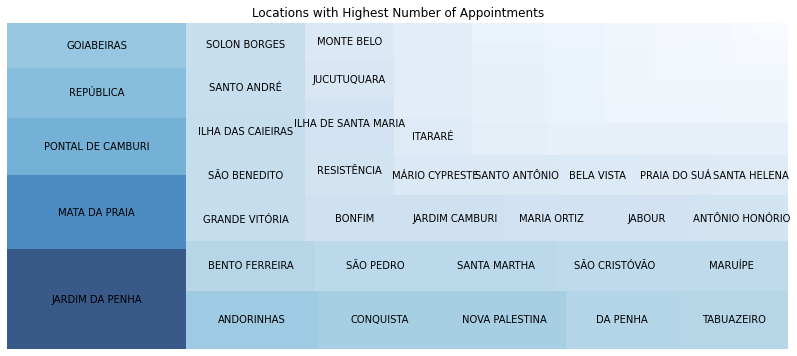

In [38]:
#plot a treemap to represent the locations from highest to lowest number of appointments
fig, ax = plt.subplots(1, figsize = (14,6))

#to specify the color scales, the darkest the blue, the highest number of appointments
cmap = plt.cm.Blues
minimum=min(group3)
maximum=max(group3)
normal = clr.Normalize(vmin=minimum, vmax=maximum)
map_colors = [cmap(normal(value)) for value in group3] 

squarify.plot(sizes=group3, label=locations_list [:35],color=map_colors, alpha=.8 )
plt.axis('off')
plt.title("Locations with Highest Number of Appointments")
plt.show()

> **Observations:** The treemap above shows the total appointments per location. The darkest the blue, the highest number of appointments per clinic. Jardima Da Penha was the highest one, followed by Mata Da Praia.

### Research Question 8: Were patients who have scolarship commited to their appointments more?

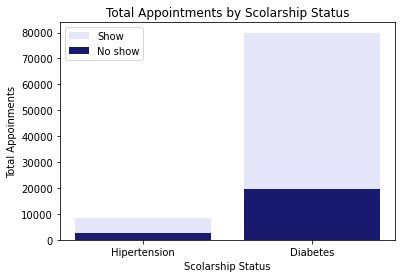

In [62]:
#to find the counts of show/no-show per Scolarship as array:
scolar1 = df[df['Scholarship']=="Has Scholarship"]
scolarship = scolar1['No_show'].value_counts().array

scolar2 = df[df['Scholarship']=="No Scholarship"]
no_scolarship = scolar2['No_show'].value_counts().array

#getting values:
show = [scolarship[0], no_scolarship[0]]
noshow = [scolarship[1], no_scolarship[1]]

# to get list of Scolarship:
scolar_list = pd.unique(df['Scholarship'])

#plotting No. of show/no-show by Scolarship
stacked_bar(diseases_list, show, noshow, "Scolarship Status","Total Appoinments", "Total Appointments by Scolarship Status")

In [40]:
#graph validation:
print('Show values= ')
print(show)
print('No show values= ')
print(noshow)

Show values= 
[8283, 79924]
No show values= 
[2578, 19741]


>**Observations:** The above stacked barchart shows the Total Appointments by Scolarship Status. Those who have scolarship represent the majority of the patients. In addition, having scolarship does not affect the commitment of the patients, as we can notice approximitly 25% of those who have scolarship are missing their appointments, which is very close to the percentage of those who do not have scolarship.

### Research Question 9: Does Alcoholism affects patients commitment to their appointments?

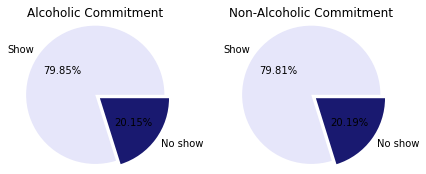

In [41]:
#to find the counts of show/no-show per alcoholism as array:
alc = df[df['Alcoholism']=="Alcoholic"]
alcoholic = alc['No_show'].value_counts().array

not_alc = df[df['Alcoholism']=="Not Alcoholic"]
not_alcoholic = not_alc['No_show'].value_counts().array

# to get list of noshow:
labels_list = pd.unique(df['No_show'])
fig = plt.figure()

#plotting No. of show/no-show by alcoholic
pie1 = fig.add_axes([0, 0, .5, .5])
pie1.pie(alcoholic, labels = labels_list,autopct='%.2f%%', explode=(0, 0.1), colors=['lavender','midnightblue'], radius = 1.2)
pie1.set_title('Alcoholic Commitment')

#plotting No. of show/no-show by non-alcoholic
pie2 = fig.add_axes([.5, .0, .5, .5])
pie2.pie(not_alcoholic, labels = labels_list, autopct='%.2f%%', explode=(0, 0.1),colors=['lavender','midnightblue'], radius = 1.2)
pie2.set_title('Non-Alcoholic Commitment')
plt.show()

In [42]:
#graph validation:
print('alcoholic values= ')
print(alcoholic)
print('not_alcoholic values= ')
print(not_alcoholic)

alcoholic values= 
<PandasArray>
[2683, 677]
Length: 2, dtype: int64
not_alcoholic values= 
<PandasArray>
[85524, 21642]
Length: 2, dtype: int64


>**Observations:** The two pie charts above compares the percentage of show/no-show between alcoholic and non-alcoholic patients. The percentage of no-shows for alcoholic is the same as those who are non-alcoholic, so alcoholism might not be a factor of patients' commitment to their appointments. However, looking at the validation section, the number of non-alcoholic represents the majority between patients.

### Research Question 10: Does receiving an SMS as a reminder improves patients commitment to their appointments?

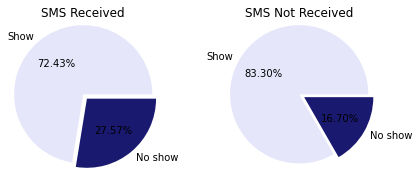

In [43]:
#to find the counts of show/no-show per sms as array:
sms = df[df['SMS_received']=="Received"]
received = sms['No_show'].value_counts().array

no_sms = df[df['SMS_received']=="Not Received"]
not_received = no_sms['No_show'].value_counts().array

# to get list of noshow:
labels_list = pd.unique(df['No_show'])
fig = plt.figure()

#plotting No. of show/no-show by alcoholic
pie1 = fig.add_axes([0, 0, .5, .5])
pie1.pie(received, labels = labels_list,autopct='%.2f%%', explode=(0, 0.1), colors=['lavender','midnightblue'], radius = 1.2)
pie1.set_title('SMS Received')

#plotting No. of show/no-show by non-alcoholic
pie2 = fig.add_axes([.5, .0, .5, .5])
pie2.pie(not_received, labels = labels_list, autopct='%.2f%%', explode=(0, 0.1),colors=['lavender','midnightblue'], radius = 1.2)
pie2.set_title('SMS Not Received')
plt.show()

In [44]:
#graph validation:
print('received values= ')
print(received)
print('not_received values= ')
print(not_received)

received values= 
<PandasArray>
[25698, 9784]
Length: 2, dtype: int64
not_received values= 
<PandasArray>
[62509, 12535]
Length: 2, dtype: int64


>**Observations:** The two pie charts above compares the percentage of show/no-show for patients who received SMS in comparasion with those who did not. The percentage of no-shows for patients who received SMS is higher than those who did not. In addition, looking at the validation section, the number of patients who did not receive an SMS is higher.

<a id='conclusions'></a>
<h2 style="color:#02B3E4">Conclusions</h2>

> **Analysis Summary**: To summarize findings and the results that have been performed, this dataset was focused on the question of whether patients have shown up for their appointment or not. Based on the analysis and observations in the previous sections,  this following conclusion has been derived: 

>  <ul>
           <li>The highest number of appointments as well as no-whos was in May 2016, when 2016 Olympics where taking place in                  Brazil. At that time, WHO published its public health advices regarding the spread of Zika virus and how to                      prevent its spread worldwide, where Brazil was one of the adversly affected countries</li>
           <li>The majority of patients were attending their appointments</li>
           <li>Females are more careful about their health in comparasion with males, they are commited to attend their                        appointments as scheduled</li>
           <li>The majority of patients were from 10 to 60 years old, however, children and seniors had the highest no-show                    rates amoung all age groups</li>
           <li>Patients who have a Hipertension tend to schedule appointments more than those who have a Diabetes</li>
           <li>Clinics in Jardima Da Penha were the highest in receiving patients, followed by clinics in Mata Da Praia</li>
           <li>The majority of patients' appointments was on scolarship, but almost 25% of them were missed by patients</li>
           <li>The percentage of no-show for alcoholic and non-alcoholic patients were almost close</li>
           <li>The number of patients who received an SMS as a reminder of their appointments was a minor comparing to those who                did not, and that might be because of technical/financial issues</li>
      </ul>

>**Analysis Limitations:** During the analysis, some limitations were found, for example data cleansing and preparation, finding the relations between categorical variables, or installing needed packages.